# Analisis Sentimen Komentar YouTube Rewind Indonesia 2020 Menggunakan Logistic Regression

### Melakukan Import Library

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import re  
import nltk  
nltk.download('stopwords')  
from nltk.corpus import stopwords  
from nltk import word_tokenize
import string

[nltk_data] Downloading package stopwords to C:\Users\Adhitya
[nltk_data]     K\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Membaca Dataset

In [3]:
data = pd.read_csv ('Komentar YouTube Dan Label.csv')
data.head()

,No,Komentar,P1,P2,P3,Hasil
0,1,trendingg,1,1,1.0,Positif
1,2,Demi apapun ini keren bangetttr,1,1,1.0,Positif
2,3,NGERIIIII,1,1,1.0,Positif
3,4,Kerennnn,1,1,1.0,Positif
4,5,Kalo dia yg mengang kek jaminan mutu gitu dah ...,1,1,1.0,Positif


Mengubah DataFrame menjadi 2 kolom

In [4]:
df = data[['Komentar','Hasil']]
df.head()

,Komentar,Hasil
0,trendingg,Positif
1,Demi apapun ini keren bangetttr,Positif
2,NGERIIIII,Positif
3,Kerennnn,Positif
4,Kalo dia yg mengang kek jaminan mutu gitu dah ...,Positif


In [5]:
df.shape

(2000, 2)

### Menambahkan kolom `sentimen`. Mengubah Komentar menjadi angka pada kolom `sentimen`

In [6]:
df['sentimen'] = 0

In [7]:
df['sentimen'][df.Hasil == 'Netral'] = 0
df['sentimen'][df.Hasil == 'Positif'] = 1
df['sentimen'][df.Hasil == 'Negatif'] = -1

In [8]:
df.head()

,Komentar,Hasil,sentimen
0,trendingg,Positif,1
1,Demi apapun ini keren bangetttr,Positif,1
2,NGERIIIII,Positif,1
3,Kerennnn,Positif,1
4,Kalo dia yg mengang kek jaminan mutu gitu dah ...,Positif,1


In [9]:
df.shape

(2000, 3)

### Menampilkan grafik batang dari sentimen

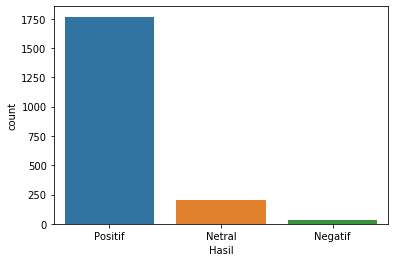

In [10]:
import seaborn as sns
sns.countplot(x='Hasil', data=df)

## Melakukan Data Preprocessing

Membuat karakter dalam kolom Komentar menjadi huruf kecil

In [11]:
df['Komentar'] = df['Komentar'].str.lower()
df['Komentar'].head()

0                                            trendingg
1                      demi apapun ini keren bangetttr
2                                            ngeriiiii
3                                             kerennnn
4    kalo dia yg mengang kek jaminan mutu gitu dah ...
Name: Komentar, dtype: object

In [12]:
df.describe()

,sentimen
count,2000.000000
mean,0.869000
std,0.378035
min,-1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [13]:
df['Komentar'][4]

'kalo dia yg mengang kek jaminan mutu gitu dah , panjang umur semua , biar anak cucu masih bisa ngerasain karya kalian ðÿ˜\x8dðÿ˜\x8dðÿ˜\x8dðÿ˜\x8d'

### Membersihkan simbol-simbol dari komentar

In [14]:
comment_clean = []
C = df.iloc[:, 0].values

for comment in range (0, len(C)):
    comment_cleaned = re.sub(r'\W', ' ', str(C[comment]))
    comment_cleaned = re.sub(r'ðÿ', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'½', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'œ', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'â', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'ï', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'º', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'ž', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'š', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'ª', ' ', comment_cleaned)
    comment_cleaned = re.sub(r'¼', ' ', comment_cleaned)
    
    comment_cleaned= re.sub(r'\s+', ' ', comment_cleaned, flags=re.I)
    comment_clean.append(comment_cleaned)

In [15]:
print(comment_clean)

['trendingg', 'demi apapun ini keren bangetttr', 'ngeriiiii', 'kerennnn', 'kalo dia yg mengang kek jaminan mutu gitu dah panjang umur semua biar anak cucu masih bisa ngerasain karya kalian ', 'huaaa keren bgt perasan jdi campur aduk seneng sedih emosi samuanya ada ', 'kangen buna hijab ', '2020 ditutup dengan ini pecah gilaa', 'merinding anjir the real masterpeace 2020 ', 'mantaap ibaratkan om dedy corbuzier jadi ketua podcast ', 'goks parah ri2020', 'alp ba ta yg mendunia ngga ada ', 'yg diawal cewe siapa woy', 'kereeeeeen ', 'ini tik tok rewind kayanya', 'aaaaa monang pecahhhh ', 'gila pecahhhh siii', 'keren banget petjaaahh ', 'aaaaaaaaa keren bat', 'ada budi ', 'mrembes seketika good job tuk semua yang terlibat ', 'keren abis asli terima kasih atas kerja kerasnya', 'wih mas ancaa pertama kali nnton yutuppp liat malam minggu miko ', 'gokil ni budget produksi nya gede bgt nih', 'di akhir video mendadak sedih liat ka jo dan andovi keluar dari pintu memberikan tanda bahwa mereka pamit 

Menambahkan kolom clean untuk komentar yang sudah dibersihkan

In [16]:
df['clean'] = comment_clean
df.head()

,Komentar,Hasil,sentimen,clean
0,trendingg,Positif,1,trendingg
1,demi apapun ini keren bangetttr,Positif,1,demi apapun ini keren bangetttr
2,ngeriiiii,Positif,1,ngeriiiii
3,kerennnn,Positif,1,kerennnn
4,kalo dia yg mengang kek jaminan mutu gitu dah ...,Positif,1,kalo dia yg mengang kek jaminan mutu gitu dah ...


In [17]:
df['clean'][4]

'kalo dia yg mengang kek jaminan mutu gitu dah panjang umur semua biar anak cucu masih bisa ngerasain karya kalian '

In [18]:
print(stopwords.words('indonesian'))

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

#### Menambahkan kata yang di lewati dalam Bahasa Indonesia

In [19]:
stop_words = set(stopwords.words('indonesian'))

In [20]:
df['clean'] = df['clean'].str.strip()

#### Menambahkan Fungsi untuk menghapus kata yang di lewati

In [21]:
def remove_stopwords(line):
    word_tokens = word_tokenize(line)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [22]:
df['stop_comments'] = df['clean'].apply(lambda x : remove_stopwords(x))
df.head()

,Komentar,Hasil,sentimen,clean,stop_comments
0,trendingg,Positif,1,trendingg,trendingg
1,demi apapun ini keren bangetttr,Positif,1,demi apapun ini keren bangetttr,apapun keren bangetttr
2,ngeriiiii,Positif,1,ngeriiiii,ngeriiiii
3,kerennnn,Positif,1,kerennnn,kerennnn
4,kalo dia yg mengang kek jaminan mutu gitu dah ...,Positif,1,kalo dia yg mengang kek jaminan mutu gitu dah ...,kalo yg mengang kek jaminan mutu gitu dah umur...


#### Membagi dataset untuk test dan training

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df['stop_comments'],df['sentimen'])

In [24]:
X_train.shape

(1500,)

In [25]:
X_test.shape

(500,)

In [26]:
df['sentimen'].value_counts()

 1    1767
 0     204
-1      29
Name: sentimen, dtype: int64

## Melakukan ekstraksi teks
Menggunakan CountVectorizer yang akan membuat kosakata dari data teks, karena modul ini menyimpan hitungan setiap kata setiap kali muncul pada teks.<br><br>
CountVectorizer memiliki 3 langkah dasar :<br>
**Tokenization** : Melakukan tokenisasi teks menjadi kata<br>
**Vocabulary** : Membuat kosakata dengan semua kata yang ada di teks/dokumen<br>
**Encode** : melakukan encode seluruh dokumen membuat vektor dengan panjang yang sama dengan kosakata.

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [28]:
tf_train.shape

(1500, 2408)

In [29]:
print(vect.vocabulary_)

{'good': 881, 'old': 1675, 'days': 605, 'kerennnnnnnnn': 1186, 'semangatt': 1965, '2021': 28, 'miawaug': 1476, 'merinding': 1471, 'asliiii': 215, 'keren': 1177, 'parahhhhh': 1729, 'gokill': 867, 'abissss': 94, 'keberadaan': 1124, 'telan': 2113, 'bumi': 473, 'asli': 212, 'ya': 2365, 'ampun': 155, 'salfok': 1910, 'bapaknya': 304, 'kak': 1094, 'fadil': 746, 'woyy': 2355, 'banget': 279, 'gue': 901, 'nnton': 1625, 'nya': 1646, '00': 0, 'raja': 1857, 'yt': 2395, 'emang': 709, 'beda': 324, 'ama': 147, 'tt': 2230, 'trendingkan': 2221, 'penikmat': 1762, 'gw': 906, 'bangga': 291, 'kerja': 1189, 'keras': 1156, 'guys': 903, 'and': 160, 'ide': 985, 'gila': 829, 'big': 412, 'thanks': 2161, 'for': 775, 'chandraliow': 507, 'team': 2109, 'proud': 1835, 'of': 1669, 'you': 2386, 'all': 137, 'yg': 2379, 'ngedis': 1586, 'gapunya': 805, 'otak': 1691, 'ri2020': 1895, 'ayo': 240, 'nyalakanindonesia': 1651, 'sooo': 2048, 'kelas': 1142, 'dunia': 693, 'hanin': 928, 'dhiya': 624, 'euy': 740, 'trending': 2213, '25

## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(tf_train,y_train)

LogisticRegression()

### Akurasi dari Dataset Training

In [31]:
lr.score(tf_train,y_train)

0.9773333333333334

### Akurasi dari Dataset Test

In [32]:
lr.score(tf_test,y_test)

0.896

### Membuat prediksi dari test dataset

In [33]:
expected = y_test
predicted = lr.predict(tf_test)

## Membuat Confussion Matrix

[[437   3   0]
 [ 43  11   0]
 [  4   2   0]]


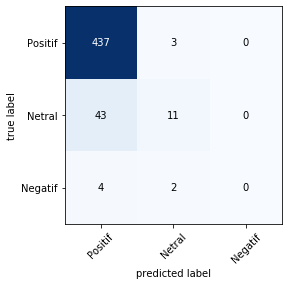

In [34]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,0,-1])
print(cf)

fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = ['Positif','Netral','Negatif'])
plt.show()

## Membuat Classification Report

In [35]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         6
           0       0.69      0.20      0.31        54
           1       0.90      0.99      0.95       440

    accuracy                           0.90       500
   macro avg       0.53      0.40      0.42       500
weighted avg       0.87      0.90      0.87       500



## Membuat F1 score

In [36]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='weighted')

0.8663238095238096